#### Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#### Statistical Information

In [3]:
df.shape

(1000, 40)

- we have 1000 rows and 40 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- We have 21 object type related features
- 17 int64 type related features
- 2 float type related features

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

#### Checking all categeorical related data

In [6]:
#checking for categeorical columns in train_df and creating list with it
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [7]:
# Lets find the unique values which are present in train_df categeorical columns
for feature in features_list:
    print(f'The unique variables in {feature} with value counts are')
    print(df[feature].value_counts())
    print('--------------------------------------')

The unique variables in policy_bind_date with value counts are
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
--------------------------------------
The unique variables in policy_state with value counts are
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
--------------------------------------
The unique variables in policy_csl with value counts are
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
--------------------------------------
The unique variables in insured_sex with value counts are
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
--------------------------------------
The unique variables in insured_education_level with value counts are
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD           

In [8]:
len(df['policy_bind_date'].unique())

951

In [9]:
len(df['incident_date'].unique())

60

In [10]:
len(df['incident_location'].unique())

1000

In [11]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

- Here we have different locations ,all the variables are unique in this feature

In [12]:
for i in features_list:
    print('Unique values for feature : ', i)
    print(df[i].unique())
    print('----------------------------------------------------------------------')

Unique values for feature :  policy_bind_date
['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04

#### Checking for numerical related features

In [13]:
#checking for numerical columns in df and creating list with it
num_features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='int64':
        num_features_list.append(feature_type)
num_features_list

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [14]:
# Lets find the unique values which are present in df numerical columns
for feature in num_features_list:
    print(f'The unique variables in {feature} with value counts are')
    print(df[feature].value_counts())
    print('--------------------------------------')

The unique variables in months_as_customer with value counts are
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
--------------------------------------
The unique variables in age with value counts are
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
--------------------------------------
The unique variables in policy_number with value counts are
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Lengt

In [15]:
df['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [16]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22])

In [17]:
len(df['policy_number'].unique())

1000

In [18]:
df['policy_deductable'].unique()

array([1000, 2000,  500])

In [19]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000])

In [20]:
for i in num_features_list:
    print('Unique values for feature : ', i)
    print(df[i].unique())
    print('----------------------------------------------------------------------')

Unique values for feature :  months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 22

- We have question marks in some of the features so replacing it as NaN

In [21]:
df.replace({'?':np.nan}, inplace=True)

<AxesSubplot:>

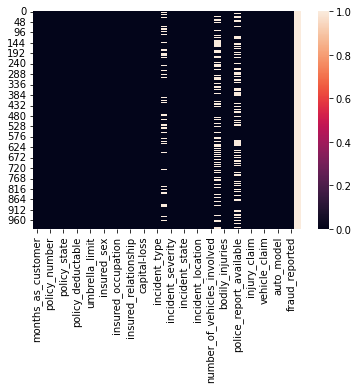

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- Now we have some null values after replacing "?" with nan values

#### _39 has no use for the model building as it is having all null values so dropping it

In [24]:
df.drop('_c39',axis=1,inplace=True)

#### Checking unique variables in categeorical features whic has nan values now

In [25]:
df.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [26]:
df.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [27]:
df.police_report_available.unique()

array(['YES', nan, 'NO'], dtype=object)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

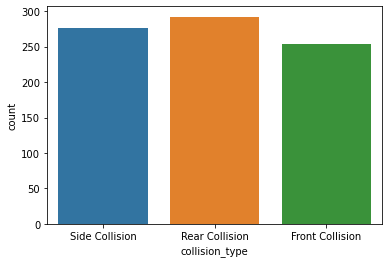

In [28]:
sns.countplot(df.collision_type)

- Rear Collision type is more in count in collision_type

#### Therefore imputing Rear_Collision to all nan values

In [29]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)
si = si.fit(df[['collision_type']])
df[['collision_type']] = si.transform(df[['collision_type']])

In [30]:
df.collision_type.isnull().sum()

0

<AxesSubplot:xlabel='property_damage', ylabel='count'>

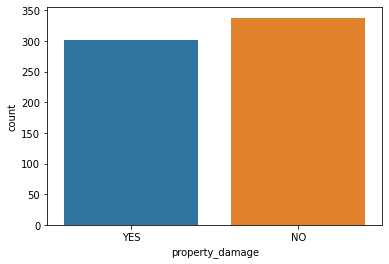

In [31]:
sns.countplot(df.property_damage)

#### Therefore imputing No to property_damage

In [32]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)
si = si.fit(df[['property_damage']])
df[['property_damage']] = si.transform(df[['property_damage']])

In [33]:
df.property_damage.isnull().sum()

0

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

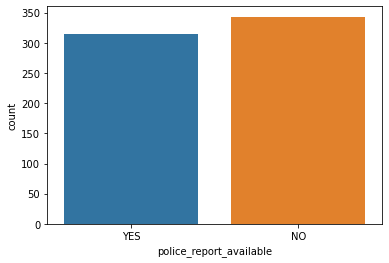

In [34]:
sns.countplot(df.police_report_available)

#### Therefore imputing No to police_report_available

In [35]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)
si = si.fit(df[['police_report_available']])
df[['police_report_available']] = si.transform(df[['police_report_available']])

In [36]:
df.police_report_available.isnull().sum()

0

In [37]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

- Now there are No Null values in the dataframe

#### Univariate Analaysis

##### fraud_reported feature

([<matplotlib.patches.Wedge at 0x138a29910>,
 [Text(-0.7851136132870644, 0.7704522141128092, 'N'),
  Text(0.785113649354535, -0.7704521773589873, 'Y')],
 [Text(-0.42824378906567145, 0.4202466622433504, '75.30%'),
  Text(0.4282438087388372, -0.42024664219581126, '24.70%')])

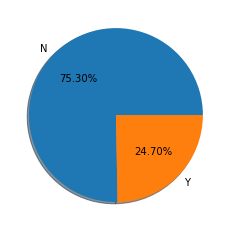

In [38]:
labels = 'N','Y'
fig,ax = plt.subplots()
ax.pie(df['fraud_reported'].value_counts(),labels=labels,radius=1,autopct='%1.2f%%',shadow=True)

- There are 75.30 % non fraudulent cases reported
- we can say that classes are imbalanced here need to handle

In [39]:
df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
529,15,34,920826,07-04-2005,IN,250/500,2000,1586.41,0,608708,...,3,NO,75570,6870,13740,54960,BMW,X5,2010,Y


#### extracting year from policy_bind_date as we prefer the year of the policies

In [40]:
# Converting policy_bind_date to datetime format
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
#extracting year from it
df['bind_year'] = df['policy_bind_date'].apply(lambda y:y.year)

###### Dropping policy_bind_date column

In [41]:
df.drop(columns=['policy_bind_date'],inplace=True)

In [42]:
df.bind_year.max()

2015

##### Extracting age of policy bind year

In [43]:
df['bind_age'] = df['bind_year'].apply(lambda y:2016-y)

##### Dropping bind year as it is no longer needed

In [44]:
df.drop(columns=['bind_year'],inplace=True)

In [45]:
# Getting all object type data
df.dtypes[df.dtypes == 'object'] 

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

<AxesSubplot:xlabel='policy_state', ylabel='count'>

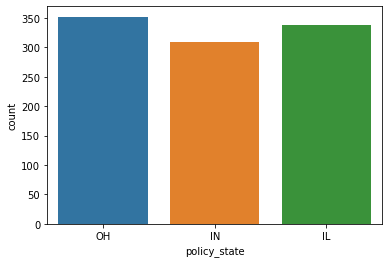

In [46]:
sns.countplot(df['policy_state'])

- Majority of the reports are in OH state followed by IL

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

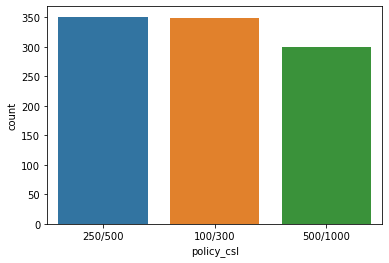

In [47]:
sns.countplot(df['policy_csl'])

- Most of the combined single limits are 250/500 and 100/300

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

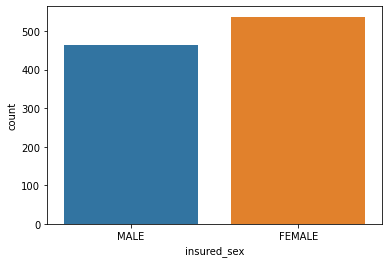

In [48]:
sns.countplot(df['insured_sex'])

- Majority of the candidates are females

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

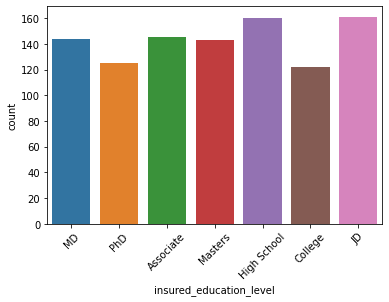

In [49]:
sns.countplot(df['insured_education_level'])
plt.xticks(rotation=45)

- customers with educstion level MD,High School and JD level are more who got insured

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

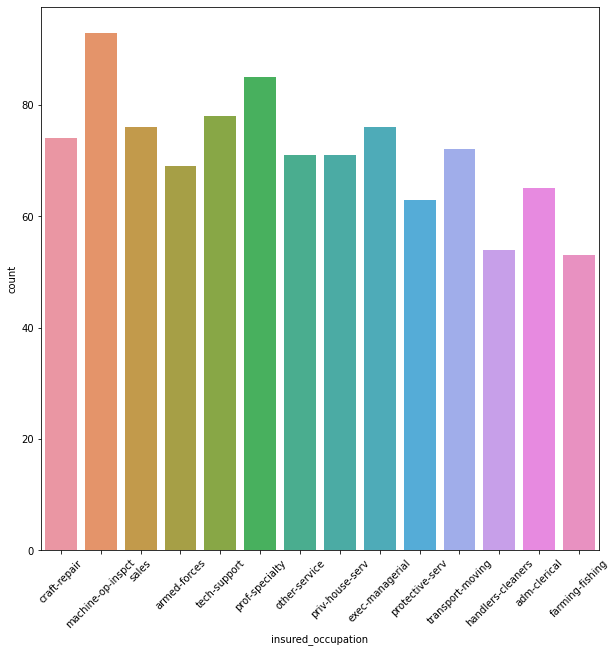

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(df['insured_occupation'])
plt.xticks(rotation=45)

- we have machine-op-inspct and prof-speciality are the most common occupations

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

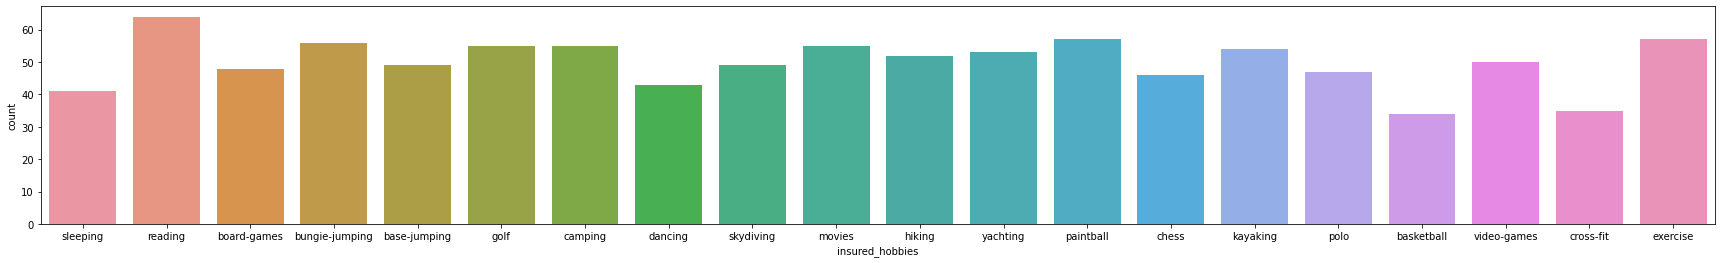

In [51]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(df['insured_hobbies'])

- reading,excercise and painball are most common hobbies

#### Incident date is actually a date type but we have it string type
##### Dropping column when extracting is done

In [52]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
# Extracting month from Date feature
df['Incident_Month'] = pd.to_datetime(df.incident_date,format="%d/%m/%y").dt.month
df.drop(columns=['incident_date'],inplace=True)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

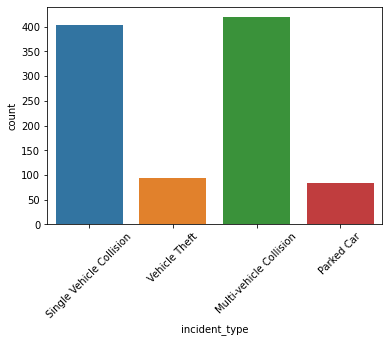

In [53]:
sns.countplot(df['incident_type'])
plt.xticks(rotation=45)

- Majorityy of cases are Multi-vehicle Collision and Single Vehicle Collision

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

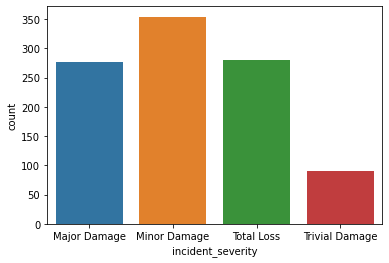

In [54]:
sns.countplot(df['incident_severity'])

- Most of the insurances are caused because of Minor Damage

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

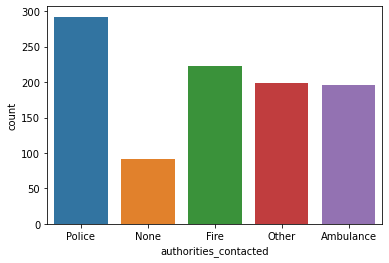

In [55]:
sns.countplot(df['authorities_contacted'])

- Most common authorities contacted were Police followed by Fire

<AxesSubplot:xlabel='incident_state', ylabel='count'>

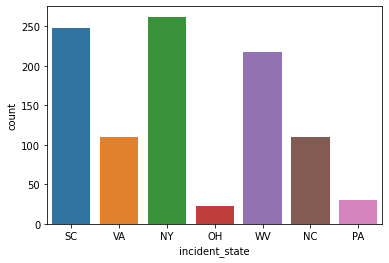

In [56]:
sns.countplot(df['incident_state'])

- Majority of the incident states are NY followed by SC,WV

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

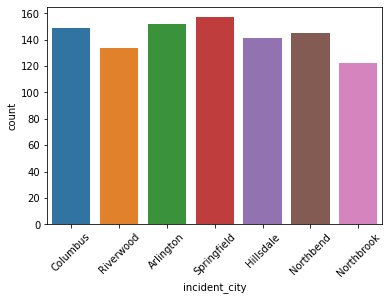

In [57]:
sns.countplot(df['incident_city'])
plt.xticks(rotation=45)

- Majority of the incidents are occured in  incident city Springfield followed by Arlington,Columbus

<AxesSubplot:xlabel='property_damage', ylabel='count'>

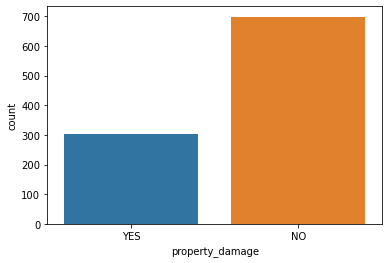

In [58]:
sns.countplot(df['property_damage'])

- Majority reported no property damage

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

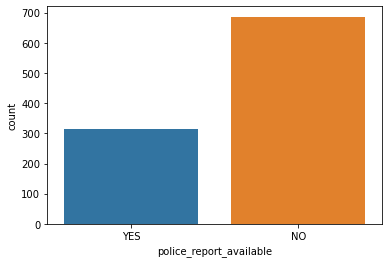

In [59]:
sns.countplot(df['police_report_available'])

- Majority doesnt have police report

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

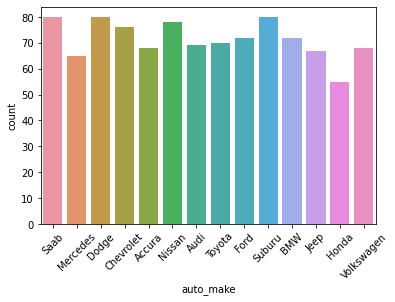

In [60]:
sns.countplot(df['auto_make'])
plt.xticks(rotation=45)

- automake have mostly equal data with little differences

<AxesSubplot:xlabel='count', ylabel='auto_model'>

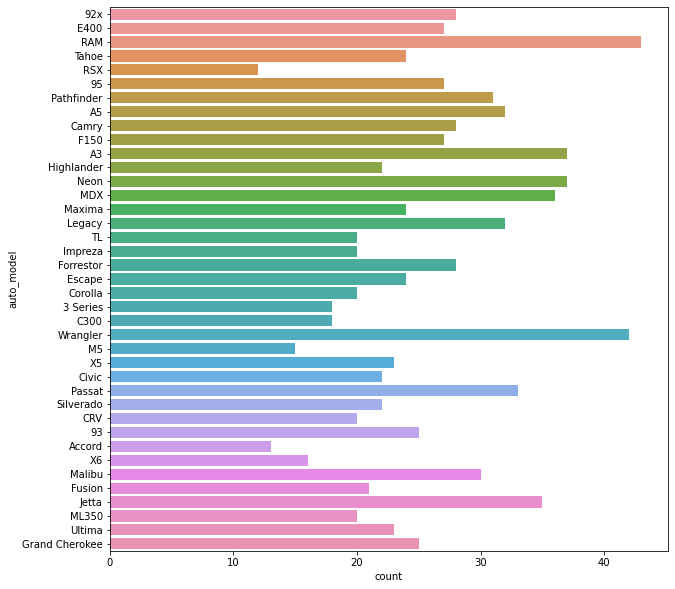

In [61]:
plt.figure(figsize=(10,10))
sns.countplot(y = df['auto_model'])

- Most reports belongs to models RAM,A3,Wrangler,Neon

In [62]:
# Getting all numerical type data
df.dtypes[df.dtypes != 'object'] 

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
bind_age                         int64
Incident_Month                   int64
dtype: object

#### We have auto age as date time as string type we need to extract age from auto year 

In [63]:
df['auto_age'] = df['auto_year'].apply(lambda y:2016-y)

In [64]:
df.drop(columns=['auto_year'],inplace=True)

#### Checking for skewness

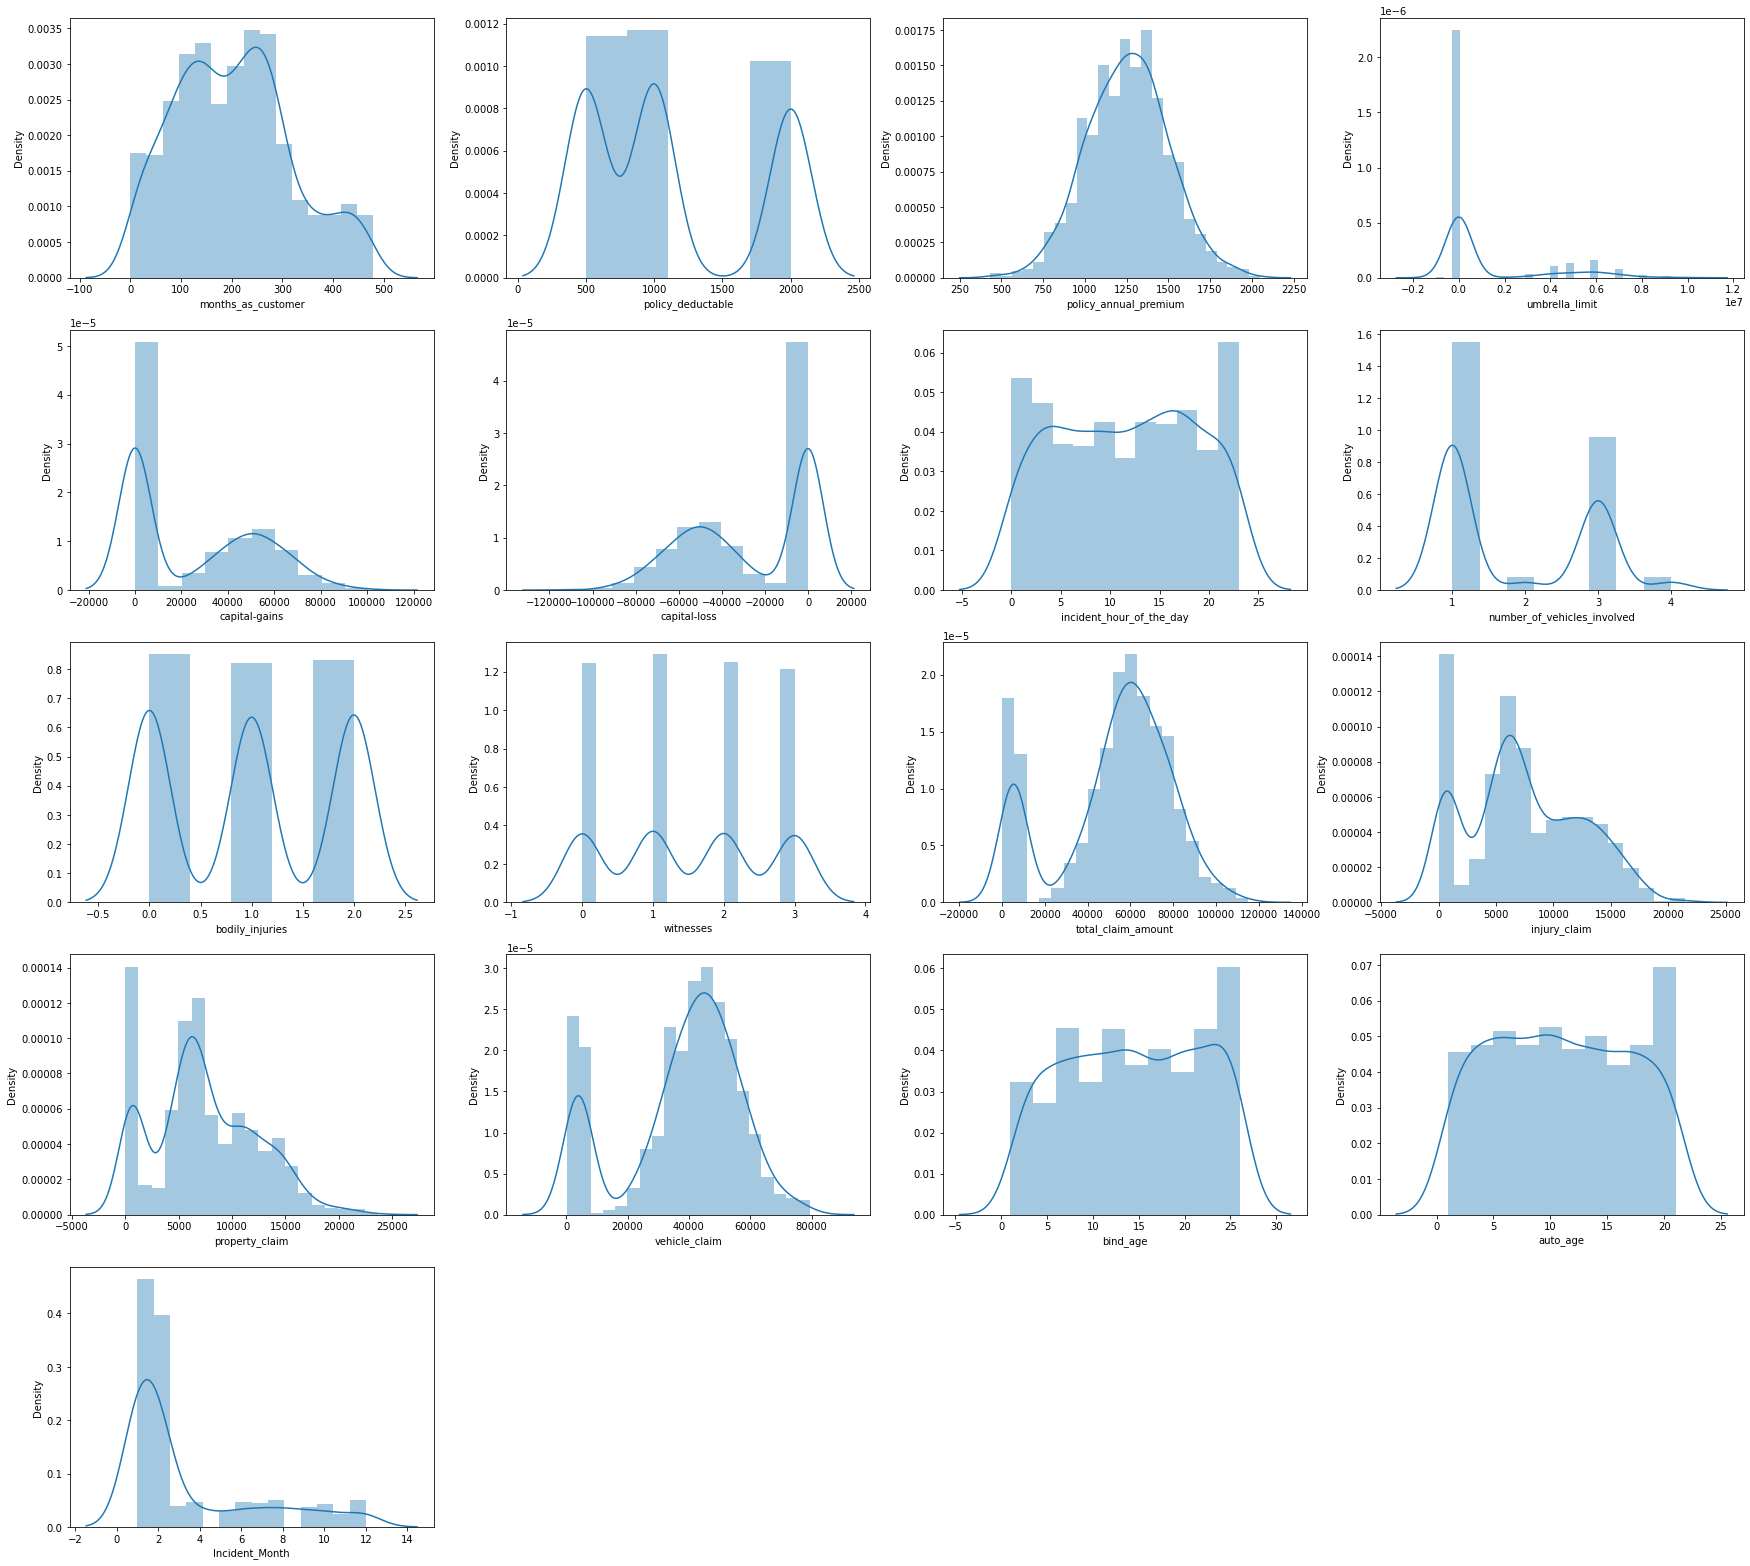

In [65]:
num_featres = ['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','bind_age','auto_age','Incident_Month']
plt.figure(figsize=(30,45),facecolor='white')
plotnum = 1
for i in num_featres:
    if plotnum <=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

- Most of the features are normally distributed and are multimodal

In [66]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
bind_age                      -0.052511
Incident_Month                 1.375894
auto_age                       0.048289
dtype: float64

#### Dropping all unnecessary columns

In [67]:
df.drop(columns=['policy_number','insured_zip','incident_location'],axis=1,inplace=True)


#### Relationship dependent and independent variables

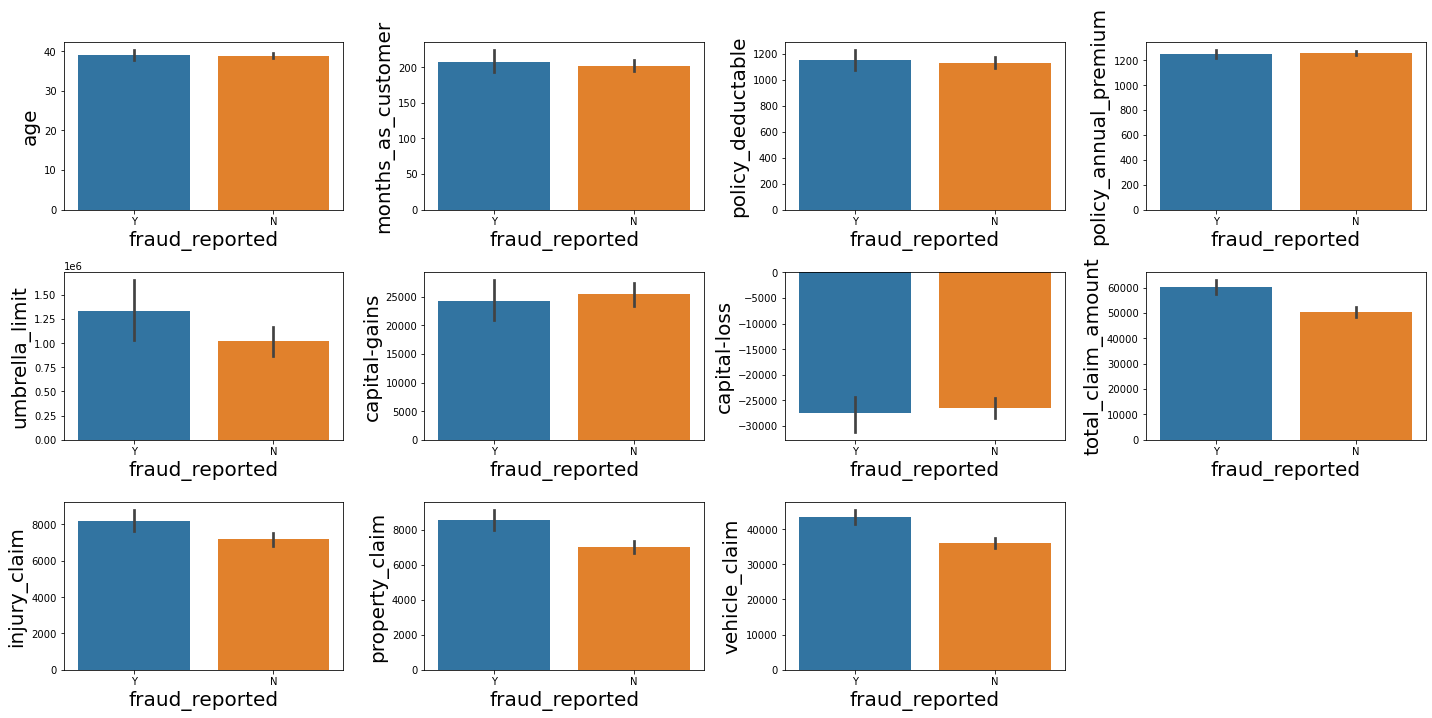

In [68]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['fraud_reported']
x = df[['age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']]
for col in x:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.barplot(y,x[col])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()


- Observations
    * age,months_as_customer,policy_deductable,policy_annual_premium,capital-gains,capital-loss, dont contribute much with fraud
    * High the umbrella limit ,more the fraud claims are filed
    * higher the total claim amount more the fraud claims are filed
    * higher the injury claim amount,more the fraud claims are filed
    * higher the propert claim amount more the fraud claims are filed
    * higher the vehicle claim amount more the fraud claims are filed
    
    
    

#### Income vs Categeorical data

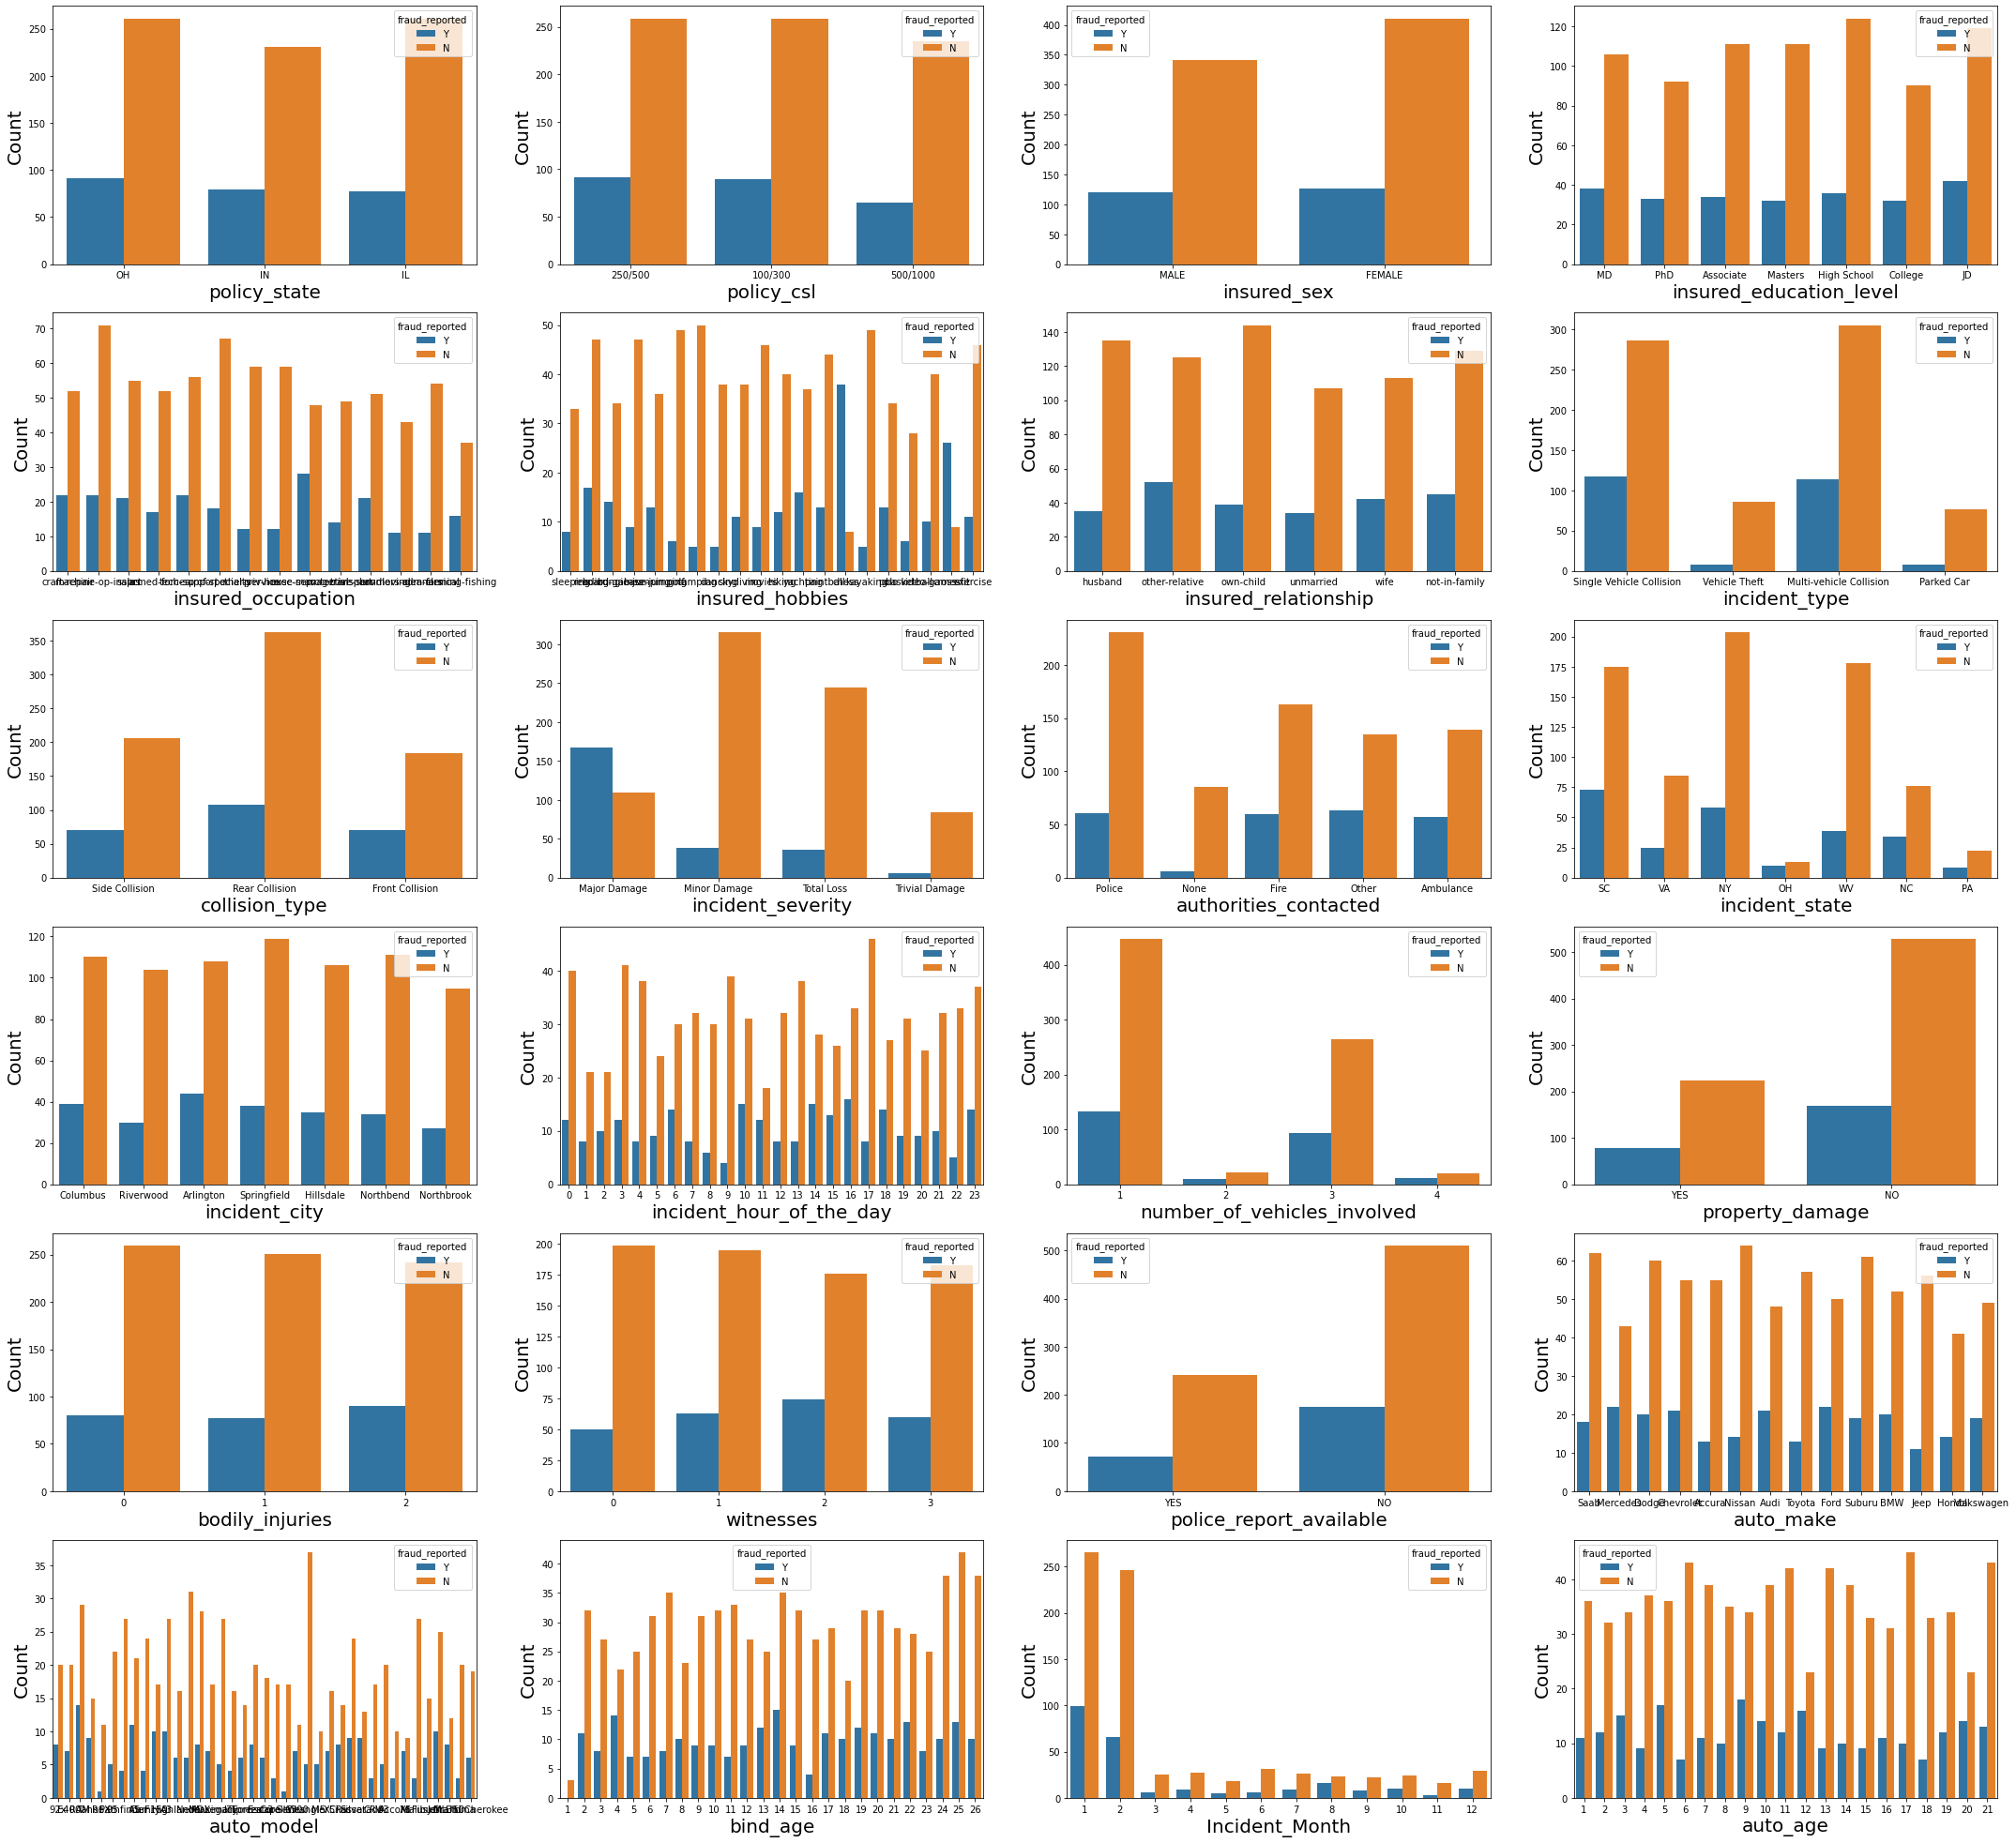

In [69]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
y = df['fraud_reported']
X = df.drop(columns=['fraud_reported','age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim'])
for col in X:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

- In Policy_state feature fraud was equally reported in all categeories
- In Policy_csl 250/500 and 100/300 has high fraud reported cases compared with 500/1000
- In Insured_sex feature fradulent cases were equally reported
- authorities contacted,bodily injuries ,incident city,witness dont seem to contribute to fraud probability
- Education levels of JD,Highschool and MD contribute most to the fraud claims filled
- single vechile collision and multi vehicle collision contribute most of teh fradulent claims filed
- incidents in states SC AND NY contribute most of the cases filed
- fraud claims are more for 1 and 3 vehicles involved in accident
- fraud claims are more for rear collision in accident
- fraud claims are most of the major damage reported
- fraud claims are most of the hours 10,14,16,18 and 23 of the day
- fraud claims are more for when propert damage reported ,no police report is avaialable,during months january and february,for car age 3,5,9,12,20,21


#### Checking for outliers with. continuos ditribution feature

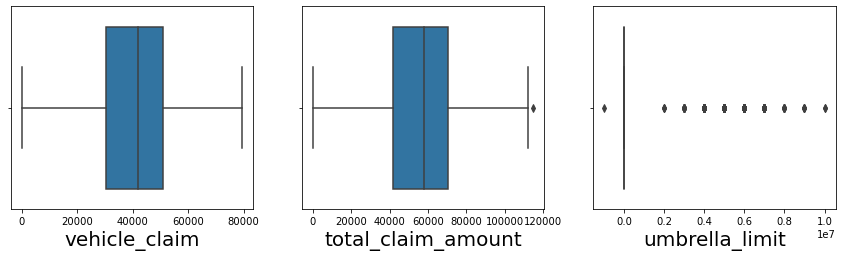

In [70]:
plt.figure(figsize=(20,35),facecolor='white')
plot_num = 1
for i in df[['vehicle_claim','total_claim_amount','umbrella_limit']]:
    if plot_num<=30:
        plt.subplot(8,4,plot_num)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plot_num+=1
plt.show()

- These outliers are not in considerable limit

In [71]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
bind_age                      -0.052511
Incident_Month                 1.375894
auto_age                       0.048289
dtype: float64

#### Reducing skeewness using yeo-johnson method

In [72]:
from sklearn.preprocessing import PowerTransformer
powstrans = PowerTransformer(method='yeo-johnson',standardize=True)
df_skew = df[['vehicle_claim','total_claim_amount']]
transformed = powstrans.fit_transform(df_skew)
transformed = pd.DataFrame(transformed,columns=df_skew.columns)

In [73]:
transformed.index = df.index
df[['vehicle_claim','total_claim_amount']] = transformed[['vehicle_claim','total_claim_amount']]

#### Encoding Categeorical columns

In [74]:
df.dtypes[df.dtypes == 'object']

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [75]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
catgs = ['auto_make','authorities_contacted','incident_severity','collision_type','incident_type','insured_relationship','insured_education_level','policy_csl','policy_state']
for col in catgs:
    df[col] = labelenc.fit_transform(df[col])


In [76]:
# Encoding Nominal Data
df['insured_sex'] = df.insured_sex.map({'MALE':1,'FEMALE':2})
df['police_report_available'] = df.police_report_available.map({'YES':2,'NO':1})
df['property_damage'] = df.property_damage.map({'YES':2,'NO':1})
df['fraud_reported'] = df.fraud_reported.map({'Y':1,'N':0})

In [77]:
# Encoding Ordinal data
odf = df[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']].copy()
dumm = pd.get_dummies(df[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']],drop_first=True)


In [78]:
dumm2 = dumm[['insured_occupation_craft-repair','insured_occupation_machine-op-inspct','insured_occupation_tech-support','incident_state_SC','incident_state_NY','insured_occupation_craft-repair','insured_occupation_transport-moving','insured_occupation_exec-managerial','insured_hobbies_cross-fit','insured_hobbies_chess','auto_model_Legacy','auto_model_TL','auto_model_Corolla','auto_model_Ultima','auto_model_Grand Cherokee','auto_model_Malibu','auto_model_Neon','auto_model_95','auto_model_Wrangler','auto_model_Camry','auto_model_RSX','auto_model_RAM','auto_model_A5','auto_model_Jetta','auto_model_ML350','auto_model_Passat','auto_model_F150','auto_model_A3']].copy()
df = df.join(dumm2)
df.drop(columns=['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model'],inplace=True)

<AxesSubplot:>

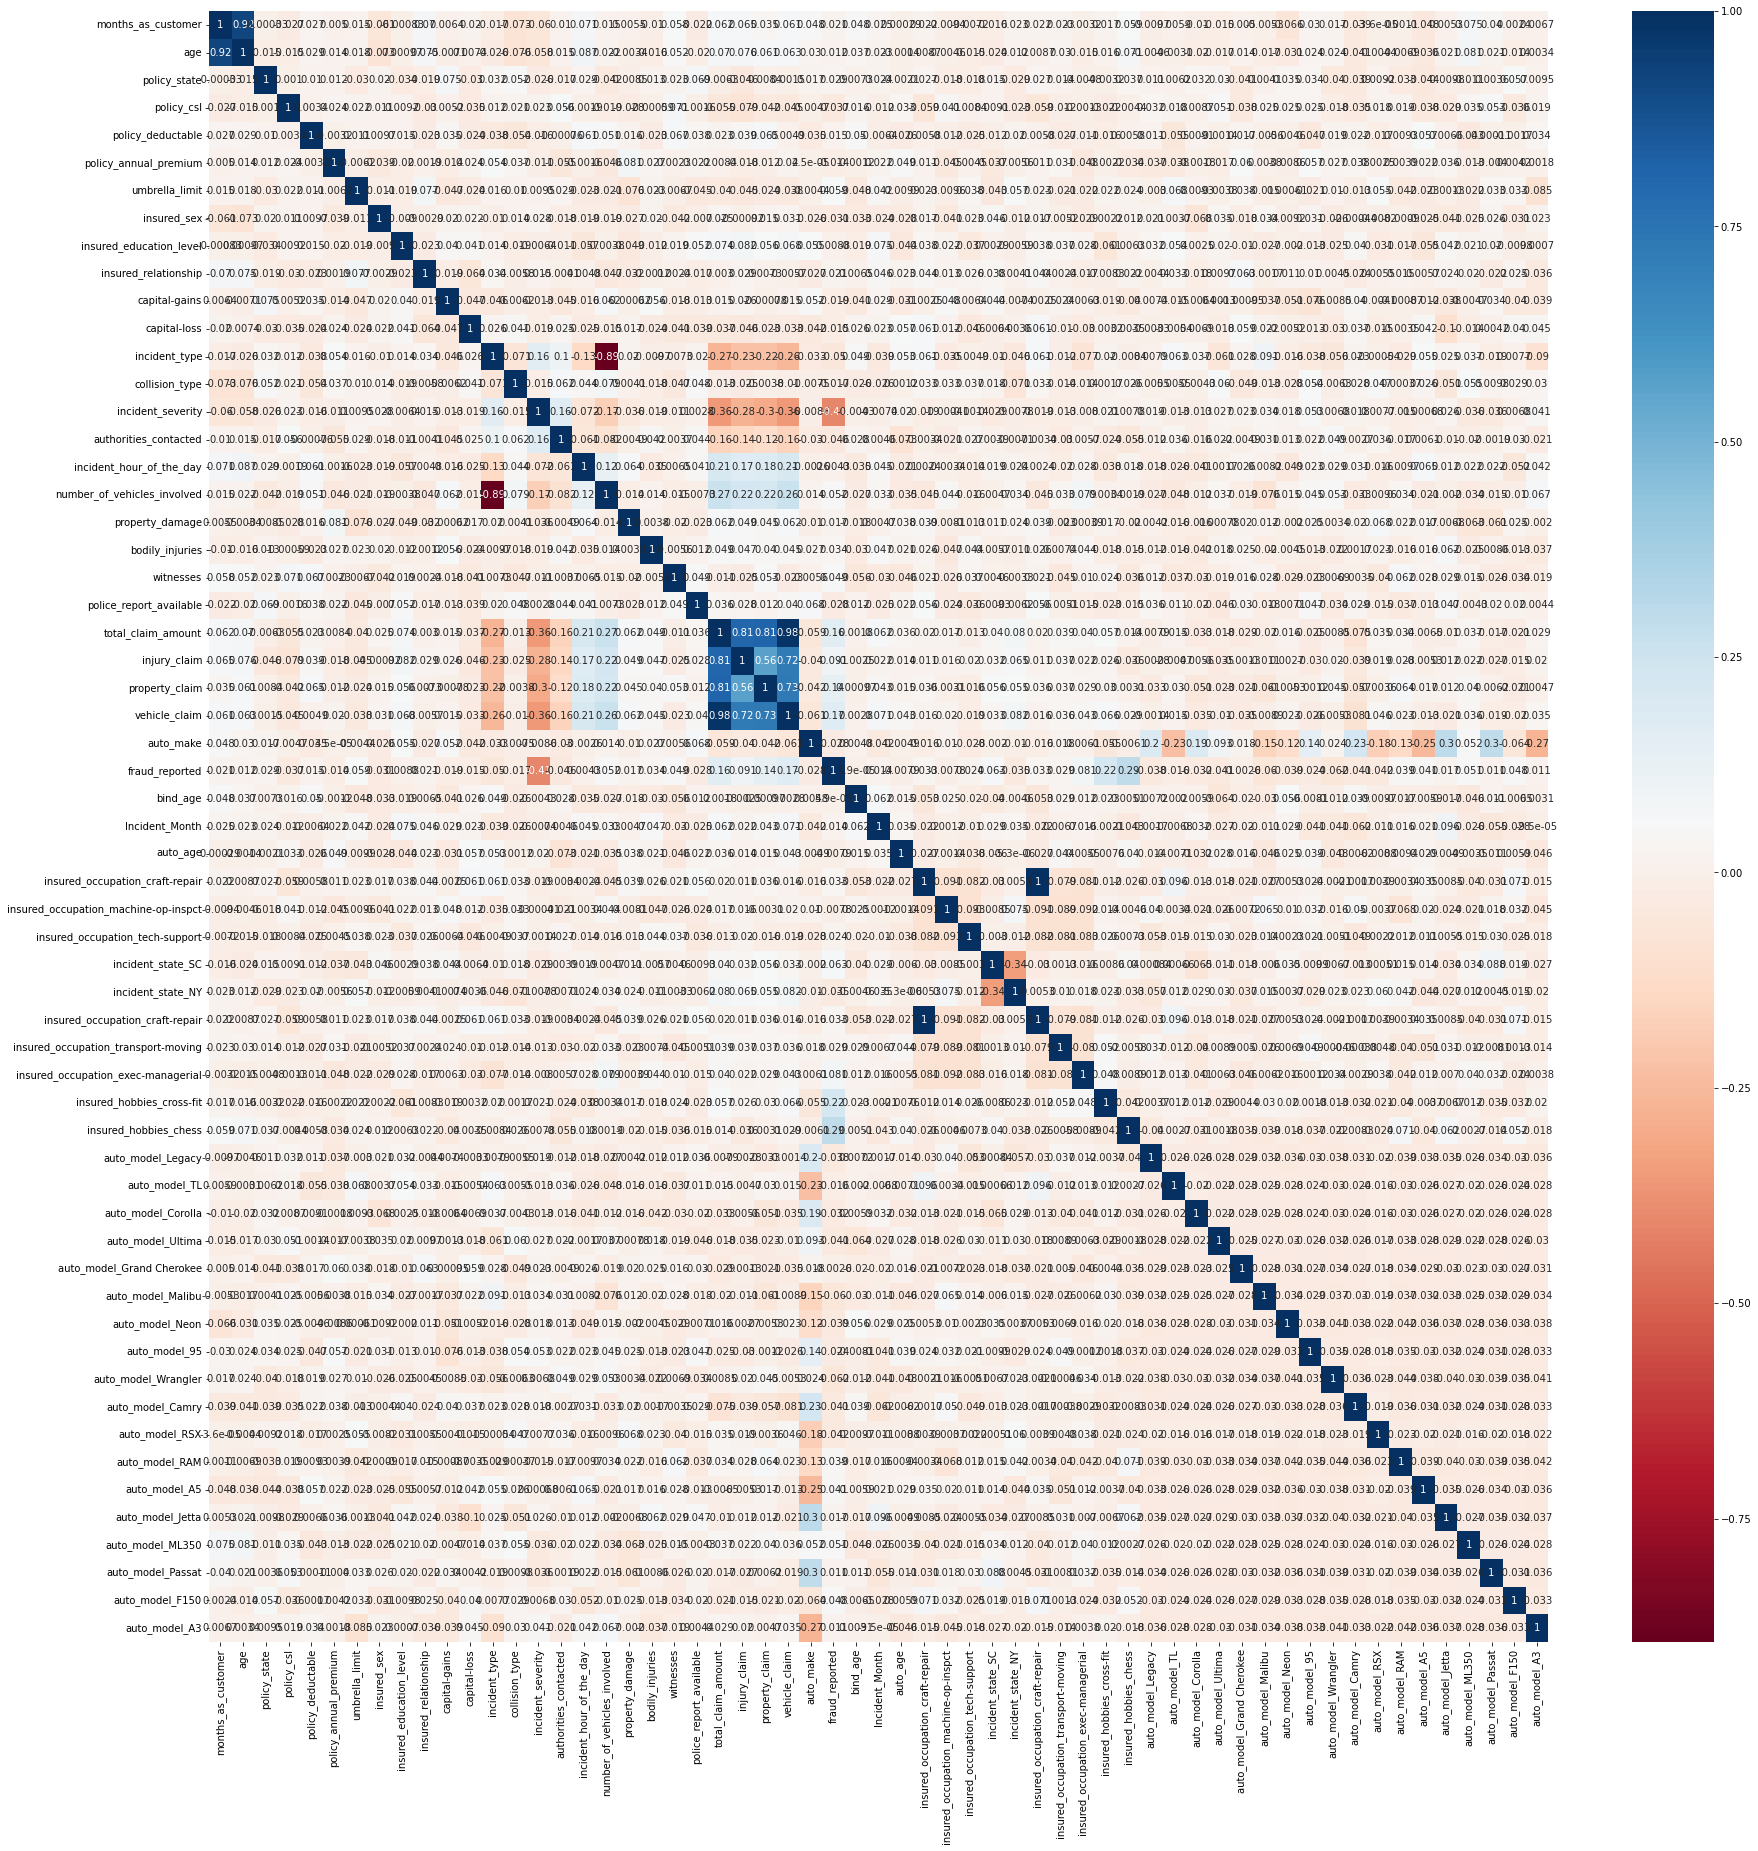

In [79]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

<AxesSubplot:>

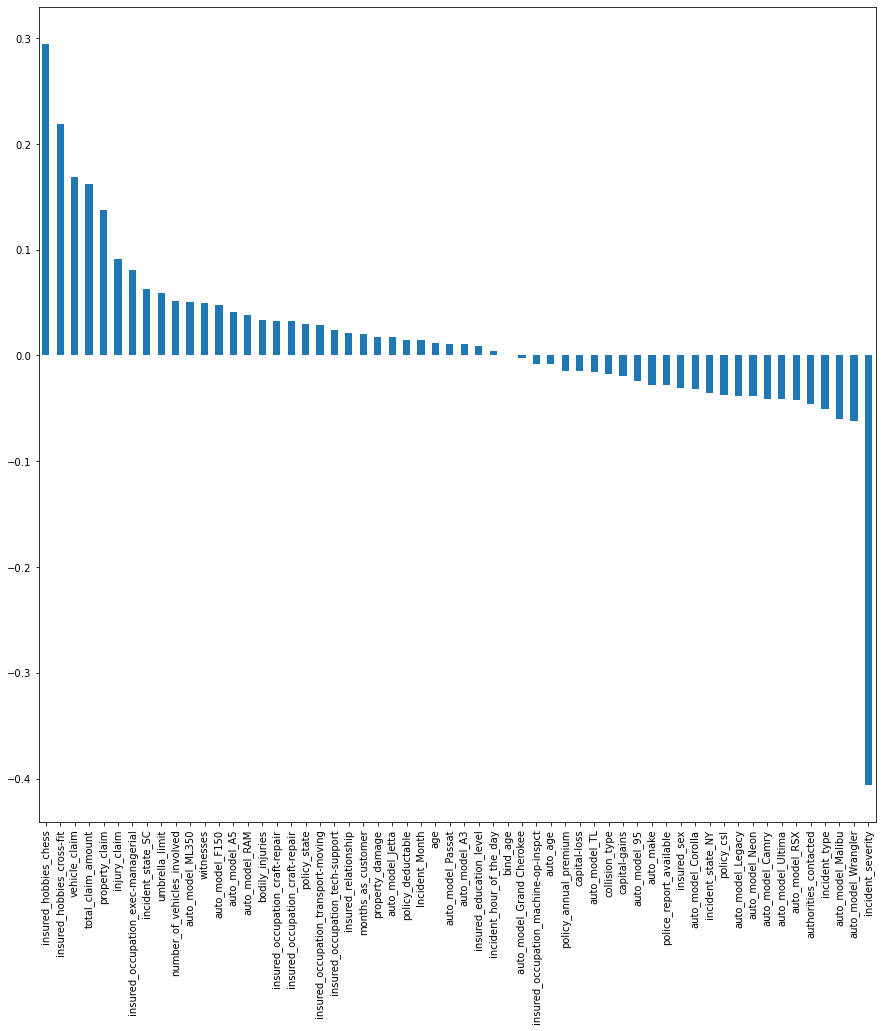

In [80]:
plt.figure(figsize=(15,15))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')

- Incident is highly negatively correlated with the data set

#### Feature Selection

In [81]:
x = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

In [82]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

#### Checking multicollinearity using VIF

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif']= [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [84]:
vif

,Features,vif
0,months_as_customer,7.011285e+00
1,age,7.006938e+00
2,policy_state,1.053444e+00
3,policy_csl,1.050276e+00
4,policy_deductable,1.053276e+00
5,policy_annual_premium,1.055143e+00
6,umbrella_limit,1.060433e+00
7,insured_sex,1.046826e+00
8,insured_education_level,1.065209e+00
9,insured_relationship,1.044241e+00


- Month as customer and age has high collinearity features

#### Principle Component Analaysis

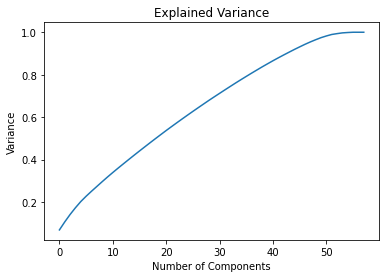

In [85]:
from sklearn.decomposition import PCA
pca = PCA()
principle_comp = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

- 55 Components explain around 95% data 

#### Selecting k-best features

In [86]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best_features = SelectKBest(score_func=f_classif, k=14)
best_fit = k_best_features.fit(x,y)
dfscores = pd.DataFrame(best_fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

                                 Feature       Score
14                     incident_severity  196.960603
39                 insured_hobbies_chess   95.024355
38             insured_hobbies_cross-fit   50.261031
25                         vehicle_claim   29.074270
22                    total_claim_amount   26.851969
24                        property_claim   19.327729
23                          injury_claim    8.328776
37    insured_occupation_exec-managerial    6.549513
33                     incident_state_SC    3.984111
48                   auto_model_Wrangler    3.866325
45                     auto_model_Malibu    3.599036
6                         umbrella_limit    3.441452
17           number_of_vehicles_involved    2.689100
54                      auto_model_ML350    2.570055
12                         incident_type    2.539153
20                             witnesses    2.451026
56                       auto_model_F150    2.271426
15                 authorities_contacted    2.

#### Selecting best features based on their scores

In [87]:
x_best = df.drop(columns=['bind_age','age'],axis=1)
scaled_x_besst = scalar.fit_transform(x_best)

### Classification model building

#### Hnadling class imbalance

In [89]:
from imblearn.over_sampling import SMOTE as sm
sm_x,sm_y = sm().fit_resample(scaled_x_besst,y.ravel())

#### Finding the best random state

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(sm_x,sm_y,test_size = .31, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 1.0 on random_state: 1


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [99]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier()]
def compare_models():
    for model in models:
        
        model.fit(x_train,y_train.ravel())
        model_predict = model.predict(x_test)
        accurcy = classification_report(y_test,model_predict)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x,y,cv=4).mean()
        print('Accuracy : ',accurcy)
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print("Confusion matrix : ",confusion_matrix(y_test,model_predict))
        print('_______________________________________________')
compare_models()

Accuracy :                precision    recall  f1-score   support

           0       0.74      1.00      0.85       228
           1       0.00      0.00      0.00        82

    accuracy                           0.74       310
   macro avg       0.37      0.50      0.42       310
weighted avg       0.54      0.74      0.62       310

R2 score of the model :  LogisticRegression() = -36.0 %
mean squared error for model :  LogisticRegression() = 0.2645161290322581
cross val score for model :  LogisticRegression() = 0.7490000000000001
Confusion matrix :  [[228   0]
 [ 82   0]]
_______________________________________________
Accuracy :                precision    recall  f1-score   support

           0       0.74      1.00      0.85       228
           1       0.00      0.00      0.00        82

    accuracy                           0.74       310
   macro avg       0.37      0.50      0.42       310
weighted avg       0.54      0.74      0.62       310

R2 score of the model :  SVC()

#### We have got good accurcay and good cross val score with GradientBoostingClassifier

### ROC AUC Curves

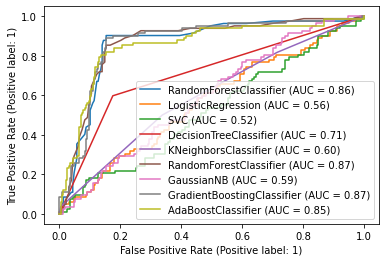

In [108]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(RandomForestClassifier().fit(x_train,y_train.ravel()),x_test,y_test)
for i in models:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc="lower right")
plt.show()
                      
                      

- Based on graphs and accuracies we got good accuracy with Gradient boosting classifier

#### Hyper parameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
grid_classifier = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
The best Score is 0.8362318840579711


#### Training model with best parameters

In [112]:
best_model = GradientBoostingClassifier(learning_rate=0.01,max_depth=3,n_estimators=250)
best_model.fit(x_train,y_train)
gradient_pred_best = best_model.predict(x_test)
gradient_acc = accuracy_score(y_test,gradient_pred_best)
print(gradient_acc*100)

86.12903225806451


- After training the model we got best score as 86.12%

#### Confusion matrix

In [113]:
confusion_matrix(y_test, gradient_pred_best)

array([[200,  28],
       [ 15,  67]])

#### Saving the model

In [114]:
import joblib
joblib.dump(best_model,"insurance_fraud_classif.pkl")

['insurance_fraud_classif.pkl']

#### Loading the model

In [115]:
mod = joblib.load("insurance_fraud_classif.pkl")
actual_data = np.array(y_test)
predicted_data = np.array(mod.predict(x_test))
df_comparision = pd.DataFrame({'actual data':actual_data,'predicted value':predicted_data})
df_comparision

,actual data,predicted value
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
305,1,1
306,1,1
307,0,0
308,0,0
